In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

import os
dir_path = 'D:\Cosmas\Desktop\CroqeeStuff\Croqee-app\server_python'

In [10]:
base_img = np.array(Image.open(dir_path + '/test_images/shapes_1_draw_1.png'))
test_image_paths = [dir_path + '/test_images/shapes_1_draw_{}.png'.format(i) for i in range(1, 13)]
test_imgs = [np.array(Image.open(x))[:,:,:3] for x in test_image_paths]


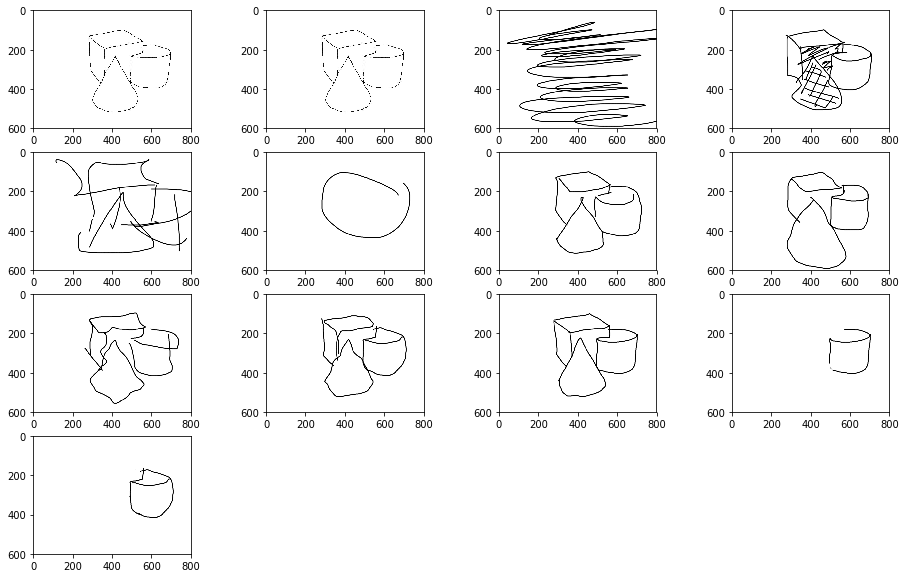

In [13]:
plt.figure(figsize=(16,10))
plt.subplot(4,4,1)
plt.imshow(base_img)
for k, img in enumerate(test_imgs):
    plt.subplot(4,4,k+2)
    plt.imshow(img)

In [14]:
from alignImages import alignImages

In [15]:
aligned_imgs = [alignImages(img, base_img) for img in test_imgs]

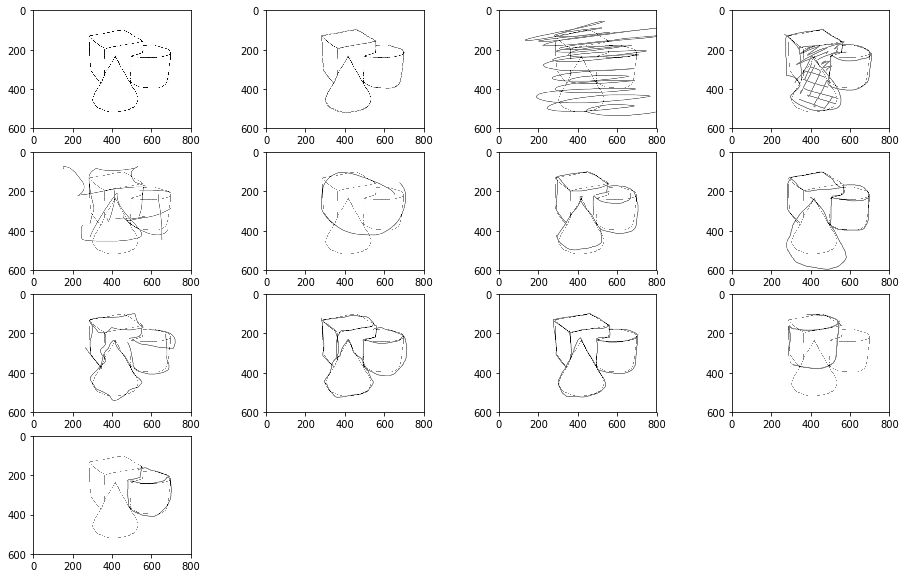

In [27]:
plt.figure(figsize=(16,10))
plt.subplot(4,4,1)
plt.imshow(base_img)
for k, img in enumerate(aligned_imgs):
    plt.subplot(4,4,k+2)
    plt.imshow((img[:, :, None]*0.5+0.5*base_img).astype(np.uint8))


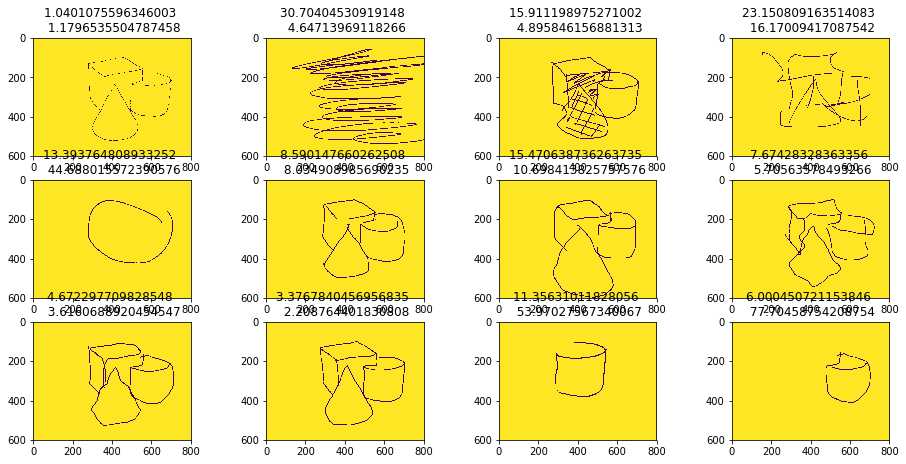

In [23]:
plt.figure(figsize=(16,10))
for k, img in enumerate(aligned_imgs):
    img1 = np.any(base_img>100, axis=2)
    img2 = img>100
    assert np.any(np.logical_not(img1)) and np.any(np.logical_not(img2))
    
    dst1 = cv.distanceTransform(img1.astype(np.uint8), cv.DIST_L2, 3)
    dst2 = cv.distanceTransform(img2.astype(np.uint8), cv.DIST_L2, 3)
    
    mean_distance1 = np.sum(dst1 * np.logical_not(img2))/np.sum(np.logical_not(img2))
    mean_distance2 = np.sum(dst2 * np.logical_not(img1))/np.sum(np.logical_not(img1))
    
    #print(mean_distance1)
    #print(mean_distance1)
    plt.subplot(4,4,k+1, title='{} \n {}'.format(mean_distance1, mean_distance2))
    plt.imshow(img2)
    

In [64]:
def compute_distance_score(img1, img2):
    img1 = np.any(base_img>100, axis=2)
    img2 = img>100
    if not (np.any(np.logical_not(img1)) and np.any(np.logical_not(img2))):
        return 0
    
    dst1 = cv.distanceTransform(img1.astype(np.uint8), cv.DIST_L2, 3)
    dst2 = cv.distanceTransform(img2.astype(np.uint8), cv.DIST_L2, 3)
    
    mean_distance_img_to_template = np.sum(dst1 * np.logical_not(img2))/np.sum(np.logical_not(img2))
    
    
    closeness_threshold = 20
    min_dist, max_dist = 4, 30
    
    close_portion = np.sum((dst2 < closeness_threshold) * np.logical_not(img1)) / np.sum(np.logical_not(img1))
    
    clipped_distance = np.clip(mean_distance_img_to_template, min_dist, max_dist)
    
    score = (clipped_distance - min_dist) / (max_dist - min_dist)
    score = (1 - score) * 100
    score *= close_portion
    
    return int(score)
    

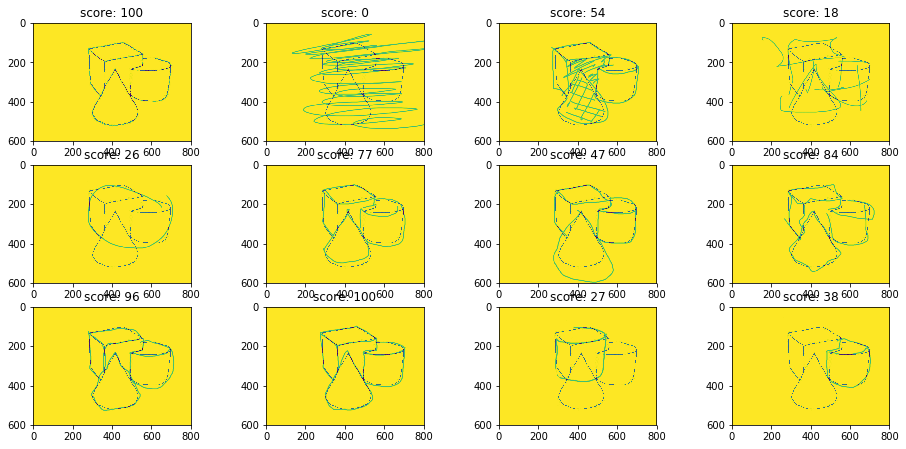

In [65]:
plt.figure(figsize=(16,10))
for k, img in enumerate(aligned_imgs):
    score = compute_distance_score(base_img, img)
    plt.subplot(4, 4,k+1, title='score: {}'.format(score))
    plt.imshow((base_img[:, : ,0]*0.7+0.3*img).astype(np.uint8))